In [17]:

import cmath
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc
import time
tic = time.time()

In [18]:
N=1000000
M=1000

In [19]:
# Geração dos símbolos
Symbols_TX = np.random.randint(0, 4, size=N)


In [20]:
# Modulador
def modulator(Symbols_TX):
    if Symbols_TX == 0:
        return complex(-1/cmath.sqrt(2),-1/cmath.sqrt(2))
    if Symbols_TX == 1:
        return complex(-1/cmath.sqrt(2),1/cmath.sqrt(2))
    if Symbols_TX == 2:
        return complex(1/cmath.sqrt(2),-1/cmath.sqrt(2))
    if Symbols_TX == 3:
        return complex(1/cmath.sqrt(2),1/cmath.sqrt(2))

In [21]:
# Demodulador
def demodulator(y):
        if y.real <=0 and y.imag <=0:
            return 0
        elif y.real <=0 and y.imag >=0:
            return 1
        elif y.real >0 and y.imag <0:
            return 2
        else:
            return 3

In [22]:
EsN0dB = np.arange(-2,22,2)
ser_simu = np.zeros(len(EsN0dB))
ser_theo = np.zeros(len(EsN0dB))
Symbols_RX = np.zeros(N)
C = np.zeros((N,len(EsN0dB)),dtype=complex)
for idx in range(0,len(EsN0dB)):
    EsN0Lin = 10.0**((EsN0dB[idx]/10.0))
    for idy in range(0,N):
        Complex_symbols= modulator(Symbols_TX[idy])
       
        s = Complex_symbols
        # Geração do ruído
        noise = np.sqrt(1/(2*EsN0Lin))*(np.random.randn(1) + 1j*np.random.randn(1))
        # Passando o sinal pelo canal AWGN
        y = s + noise
        C[idy][idx]=y
        d = demodulator(y)
        Symbols_RX[idy] = d
    ser_theo[idx] = erfc(np.sqrt(0.5*(EsN0Lin)))-(1/4)*(erfc(np.sqrt(0.5*(EsN0Lin))))**2.0
    erros = np.sum(Symbols_TX != Symbols_RX)
    ser_simu[idx] = erros/N
   


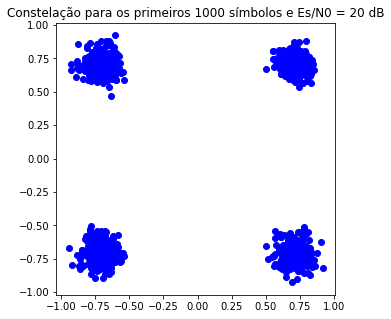

In [23]:
# Com o plot da constelação o arquivo fica muito pesado e não carrega no gitHub...
plt.figure(figsize= (5,5))
plt.title(f'Constelação para os primeiros {M} símbolos e Es/N0 = {EsN0dB[idx]} dB')
plt.plot(C[range(0,1000),idx].real, C[range(0,1000),idx].imag, 'bo')

A simulação demorou 286.4995639324188 segundos


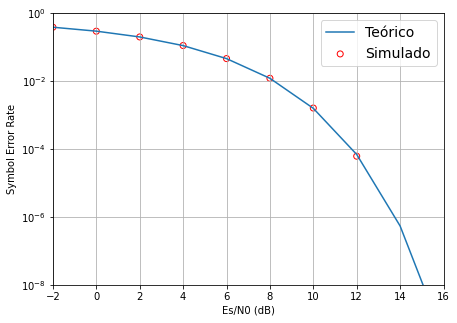

In [24]:
fig = plt.figure(figsize=(7,5))
plt.scatter(EsN0dB, ser_simu, facecolor='None', edgecolor='r', label='Simulado')
plt.plot(EsN0dB, ser_theo, label='Teórico')
plt.yscale('log')
plt.xlabel('Es/N0 (dB)')
plt.ylabel('Symbol Error Rate')
plt.grid()
plt.legend(fontsize=14)
plt.xlim([-2, 16])
plt.ylim([1e-8, 1])
toc = time.time()
tempo = toc-tic
print(f'A simulação demorou {tempo} segundos')